<a href="https://colab.research.google.com/github/arianesannt/notebooks/blob/main/atividadeFIAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema de negócio


Qual o montante de venda de exportação nos ultimos 15 anos? Separe a análise por país e traga as prospecções futuras e possíveis ações de melhoria nas exportações.

O Head solicitou a construção de uma tabela contendo:


*   País de origem
*   País destino
*   Quantidade em litros de vinho exportado (1kg = 1L)
*   Valor em U$$  




Fatores externos que podem influenciar as análises:

1.   Dados climáticos
2.   Dados demográficos
3.   Dados econômicos
4.   Dados de avaliação de vinhos












## Importando bibliotecas

In [1]:

# importando as bibliotecas

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
from datetime import date

# Organização, tratamento e exploração - dataset ExpVinho.csv

## Importando os dados

In [2]:
exportacao = pd.read_csv('https://github.com/arianesannt/dados/raw/main/ExpVinho.csv', sep=';')
exportacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Organizando os dados (formatação, limpeza, etc.)

In [3]:
# vou excluir a coluna 'Id', porque não vejo utilidade de mantê-la, pois não traz informação relevante, é apenas um identificador que aqui não tem importância

exportacao = exportacao.drop('Id', axis=1)
exportacao.head()

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,Angola,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# o problema de negócio pede que sejam analisados os últimos 15 anos
# vou deixar somente as colunas de anos que interessam
# como cada coluna representa um valor de quantidade e de valor monetario por ano, eu vou conservar somente as últimas 30 colunas

colunas = exportacao.columns[-30:]
colunas = colunas.insert(0, 'País')
colunas

Index(['País', '2008', '2008.1', '2009', '2009.1', '2010', '2010.1', '2011',
       '2011.1', '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015',
       '2015.1', '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019',
       '2019.1', '2020', '2020.1', '2021', '2021.1', '2022', '2022.1'],
      dtype='object')

In [5]:
exportacao = exportacao[colunas]
exportacao.head()

,País,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,...,477,709,345,1065,0,0,0,0,4068,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Divisão do dataframe exportacao em dois menores - etapa intermédiaria para organização dos dados

In [6]:
# vou separar os valores das variáveis 'quantidade' e 'valor' que hoje estão representadas no dataframe como ANO e ANO.1 respectivamente
quantidadekg = []
valoruss = []

for item in exportacao.columns:
  if item == 'País':
    quantidadekg.append(item)
    valoruss.append(item)
  elif len(item) == 4:
    quantidadekg.append(item)
  else:
    valoruss.append(item)

In [7]:
# criando dataframe só com dados da quantidade

quantidade_kg = exportacao[quantidadekg]
quantidade_kg.head()

,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0
2,"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
3,Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# criando dataframe só com dados de valores em U$$

valor_uss = exportacao[valoruss]
valor_uss.head()

,País,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0
2,"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
3,Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# retirando o '.1' do valor da coluna para que futuramente eu consiga juntar as tabelas
# passo 1: organizar os nomes das colunas em uma lista retirando as 2 últimas strings

colunas = valor_uss.columns[1:].str[:-2]

# inserindo na lista de coluna o item 'País' que foi retirado acima
colunas = colunas.insert(0, 'País')
colunas

Index(['País', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [10]:
# passo 2: atualizar o nome das colunas do dataframe com a lista de nomes atualizadas ('colunas')

valor_uss.columns = colunas
valor_uss.head()

,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0
2,"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
3,Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Finalizando a organização dos dados com a junção das tabelas auxiliares

In [11]:
# transformando as tabelas para formatar para o join

quantidade_kg = quantidade_kg.melt(id_vars=['País'], value_vars=quantidade_kg.columns[1:])
valor_uss = valor_uss.melt(id_vars=['País'], value_vars=valor_uss.columns[1:])

display(quantidade_kg.head())
display(valor_uss.head())

,País,variable,value
0,Afeganistão,2008,0
1,África do Sul,2008,0
2,"Alemanha, República Democrática",2008,265742
3,Angola,2008,25721
4,Anguilla,2008,0


,País,variable,value
0,Afeganistão,2008,0
1,África do Sul,2008,0
2,"Alemanha, República Democrática",2008,429970
3,Angola,2008,71083
4,Anguilla,2008,0


In [12]:
# renomeando as colunas para a correta identificação das variáveis

quantidade_kg.columns = ['pais_destino', 'ano', 'quantidade_l']
valor_uss.columns = ['pais_destino', 'ano', 'valor_uss']

display(quantidade_kg.head(3))
display(valor_uss.head(3))

,pais_destino,ano,quantidade_l
0,Afeganistão,2008,0
1,África do Sul,2008,0
2,"Alemanha, República Democrática",2008,265742


,pais_destino,ano,valor_uss
0,Afeganistão,2008,0
1,África do Sul,2008,0
2,"Alemanha, República Democrática",2008,429970


In [13]:
# fazendo o .join() entre as duas tabelas para tranasformá-la em uma só
exportacao = quantidade_kg.join(valor_uss['valor_uss'])
exportacao.head()

,pais_destino,ano,quantidade_l,valor_uss
0,Afeganistão,2008,0,0
1,África do Sul,2008,0,0
2,"Alemanha, República Democrática",2008,265742,429970
3,Angola,2008,25721,71083
4,Anguilla,2008,0,0


In [14]:
exportacao.isna().sum()

pais_destino    0
ano             0
quantidade_l    0
valor_uss       0
dtype: int64

In [29]:
# alterando a coluna ano para o time datetime

exportacao['ano'] = pd.to_datetime(exportacao['ano'], format='%Y')
exportacao.dtypes

pais_destino            object
ano             datetime64[ns]
quantidade_l             int64
valor_uss                int64
dtype: object

## Explorando as exportações (data = exportacao) - primeiras informações e primeiros gráficos

In [33]:
# colocando a coluna 'ano' como index

exportacao1 = exportacao.set_index('ano')
exportacao1.tail()

,pais_destino,quantidade_l,valor_uss
ano,,,
2022-01-01,Tuvalu,0,0
2022-01-01,Uruguai,637117,997367
2022-01-01,Vanuatu,0,0
2022-01-01,Venezuela,23220,32351
2022-01-01,Vietnã,130,277


<Axes: xlabel='ano'>

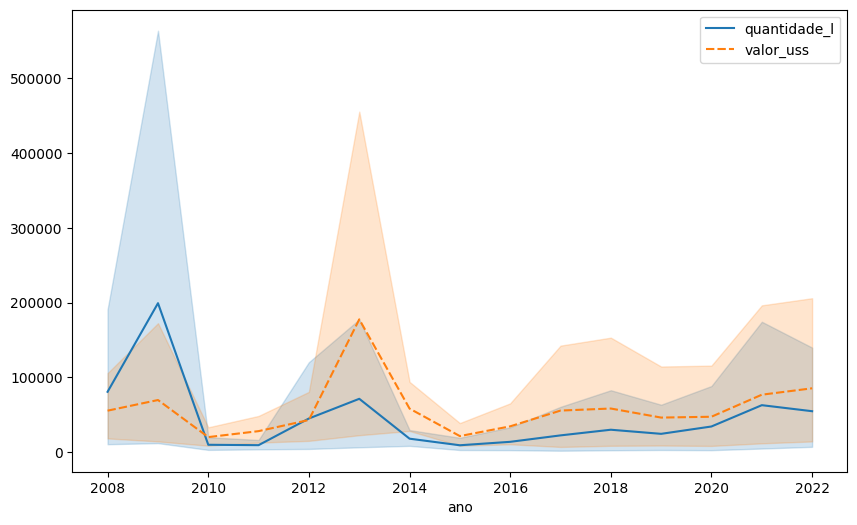

In [34]:
# gerando gráfico de linha

plt.figure(figsize=(10,6))

sns.lineplot(data=exportacao1)

In [18]:
# analisando o somatorio de vendas por pais (foco no valor monetario) do ultimos 15 anos

somatorio_venda_por_pais = exportacao.groupby(by='pais_destino').sum(['quantidade_l', 'valor_uss'])
somatorio_venda_por_pais = somatorio_venda_por_pais.sort_values(by='valor_uss', ascending=False)
somatorio_venda_por_pais

,quantidade_l,valor_uss
pais_destino,,
Paraguai,29214770,38719031
Rússia,39029799,25504484
Estados Unidos,3563355,9684567
China,2509458,4746525
Reino Unido,1239551,4711464
...,...,...
Senegal,0,0
Jamaica,0,0
Anguilla,0,0


In [19]:
# vou separar os paises que compraram do brasil dos paises que não compraram do brasil

paises_exportacao_zero = somatorio_venda_por_pais[somatorio_venda_por_pais['valor_uss'] == 0]
paises_exportacao_ativa = somatorio_venda_por_pais[somatorio_venda_por_pais['valor_uss'] != 0]

display(paises_exportacao_zero.head())
display(paises_exportacao_ativa.head())

,quantidade_l,valor_uss
pais_destino,,
Tanzânia,0,0
República Dominicana,0,0
Iraque,0,0
Costa do Marfim,0,0
Porto Rico,0,0


,quantidade_l,valor_uss
pais_destino,,
Paraguai,29214770,38719031
Rússia,39029799,25504484
Estados Unidos,3563355,9684567
China,2509458,4746525
Reino Unido,1239551,4711464


In [20]:
paises_exportacao_ativa.sum()

quantidade_l     87982432
valor_uss       112644316
dtype: int64

<Axes: xlabel='pais_destino'>

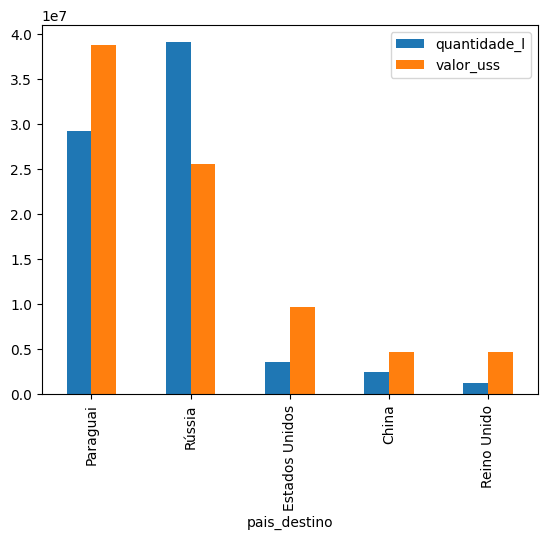

In [21]:
paises_exportacao_ativa.head().plot(kind='bar')

In [22]:
paises_exportacao_zero.index

Index(['Tanzânia', 'República Dominicana', 'Iraque', 'Costa do Marfim',
       'Porto Rico', 'Ilhas Virgens', 'Senegal', 'Jamaica', 'Anguilla',
       'Líbano', 'Tunísia'],
      dtype='object', name='pais_destino')

### insights iniciais

nos últimos 15 anos, o montante do valor de exportação de vinho foi de U$$112,644,316 e a quantidade de vinho exportado de 87.982.432 litros

o país que mais comprou do brasil em termos monetarios foi o Paraguai e o país que comprou mais litros foi a Rússia

os países que não compram vinho do pais são:'Tanzânia', 'República Dominicana', 'Iraque', 'Costa do Marfim','Porto Rico', 'Ilhas Virgens', 'Senegal', 'Jamaica', 'Anguilla', 'Líbano', 'Tunísia'